# Outline

## Understanding background, data, expectation 

## Explorary Data Analysis 

1. info, describe
2. visulaization 
3. skew, correlation 

## Data preprocessing

### data clean

0. data type - numerical and categorical- one hot encoder?  

1. missing data

mode for categorical, and mean for numerical data 

2. imbalance data (output)

undersampling and oversampling, SMOTE 

4. long-tail data - skewnes: rescale, square root or log 

(1) histogram, (2) vollion plot 

5. Outlier detection - quantile 

robustscaler 



## Data split 

0. extract x and y 
1. robustscaler or outlier remove + normalization 
2. 80% and 20% 

3. k-fold cross-validation 不做这个，但可以说


## Modeling 

### Model selection

1. logistic regression
2. SVM 
3. Decision tree
4. Random forest
5. Gradient boosting 
5.1 neural networks

6. KNN
7. Naive Bayes

### Model hyperparameter tuning
1. gridsearch
2. 


## Metric, performance and Visualization

0. cross-validation
1. accuracy
2. precision， recall，F1-score
3. ROC and AUC curve 
4. confusion matrix 
print(confusion_matrix)提前加载好


## Explain the results and how to make decision 


## Multiclass 如何handle？ 



In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Scaling
from sklearn.preprocessing import RobustScaler

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score


# Cross Validation
from sklearn.model_selection import cross_val_score

In [58]:
# data loading 
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [61]:
# Good No Null Values!
df.isnull().sum().max()

0

In [62]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [63]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

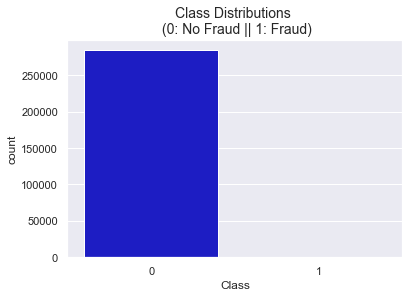

In [64]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

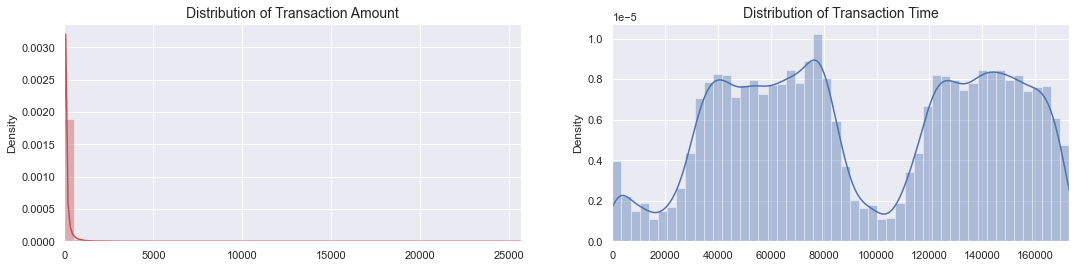

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [66]:
df1 = df 

scaler = RobustScaler()
cols = ['Amount', 'Time']
df1[cols] = scaler.fit_transform(df1[cols])

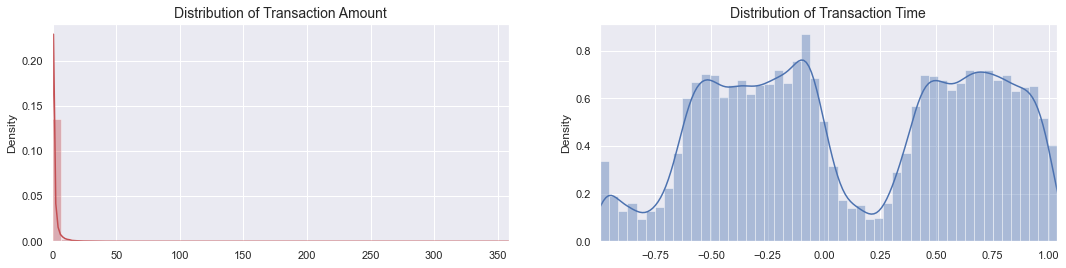

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df1['Amount'].values
time_val = df1['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [68]:
# 先分割data再做smote，否则会有data leakage 

X = df1.drop(["Class"], axis=1)
y = df1["Class"]
X

y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [72]:
X_train.shape

(227845, 30)

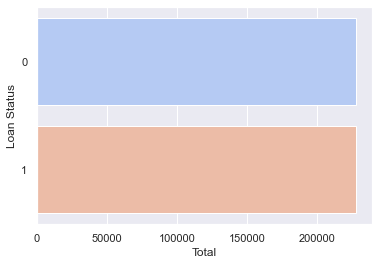

In [73]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df1, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [74]:
X_train.shape

(454902, 30)

In [75]:
X_test.shape

(56962, 30)

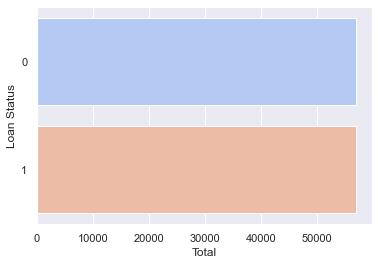

In [38]:
# X_test, y_test = SMOTE().fit_resample(X_test, y_test)

# sns.set_theme(style="darkgrid")
# sns.countplot(y=y_test, data=df1, palette="coolwarm")
# plt.ylabel('Loan Status')
# plt.xlabel('Total')
# plt.show()

In [76]:
X_test.shape

(56962, 30)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.93      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

[[55475  1389]
 [    7    91]]
LR accuracy: 97.55%


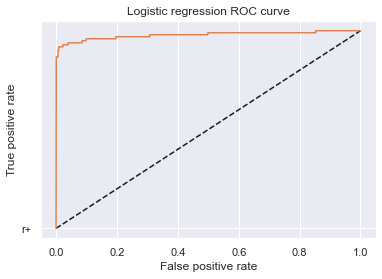

0.9780699456203414


In [77]:
LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

y_pred_prob = LRclassifier.predict_proba(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

 # roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

# plotting the curve
plt.plot([0,1],[0,1],'k--','r+')
plt.plot(fpr, tpr, label = 'Logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic regression ROC curve')
plt.show()

print(roc_auc_score(y_test, y_pred_prob[:,1]))

Text(0.5, -17.009591398798342, 'Predicted label')

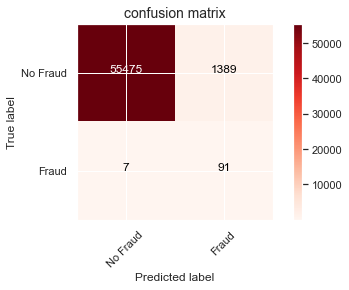

In [85]:
import itertools

labels = ['No Fraud', 'Fraud']
classes = labels

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('confusion matrix', fontsize=14)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [41]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56864
           1       0.97      0.92      0.95     56864

    accuracy                           0.95    113728
   macro avg       0.95      0.95      0.95    113728
weighted avg       0.95      0.95      0.95    113728

[[55454  1410]
 [ 4323 52541]]
LR accuracy: 94.96%


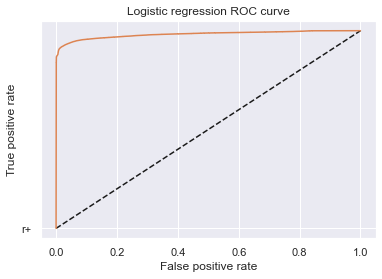

0.9813340589396882


In [43]:
y_pred = log_reg.predict(X_test)

y_pred_prob = log_reg.predict_proba(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

 # roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

# plotting the curve
plt.plot([0,1],[0,1],'k--','r+')
plt.plot(fpr, tpr, label = 'Logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic regression ROC curve')
plt.show()

print(roc_auc_score(y_test, y_pred_prob[:,1]))

## neural networks

In [45]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
# from keras.optimizers import Adam

from tensorflow.keras.optimizers import Adam # - Works
# from tensorflow.keras.optimizers import adam # - Does not work
# from keras.optimizers import Adam            # - Does not work
# from keras.optimizers import adam            # - Does not work

from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

2022-07-13 10:17:26.735343: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [47]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

undersample_predictions = undersample_model.predict(X_test, batch_size=200, verbose=0)

Epoch 1/20
14557/14557 - 11s - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0048 - val_accuracy: 0.9998 - 11s/epoch - 753us/step
Epoch 2/20
14557/14557 - 10s - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.0014 - val_accuracy: 1.0000 - 10s/epoch - 721us/step
Epoch 3/20
14557/14557 - 10s - loss: 0.0049 - accuracy: 0.9989 - val_loss: 4.7889e-04 - val_accuracy: 1.0000 - 10s/epoch - 719us/step
Epoch 4/20
14557/14557 - 10s - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0015 - val_accuracy: 1.0000 - 10s/epoch - 717us/step
Epoch 5/20
14557/14557 - 10s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0011 - val_accuracy: 1.0000 - 10s/epoch - 717us/step
Epoch 6/20
14557/14557 - 10s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 9.6998e-04 - val_accuracy: 0.9999 - 10s/epoch - 715us/step
Epoch 7/20
14557/14557 - 10s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 3.0266e-04 - val_accuracy: 1.0000 - 10s/epoch - 721us/step
Epoch 8/20
14557/14557 - 11s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0

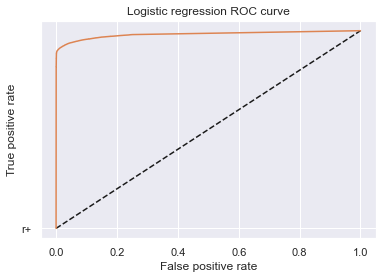

0.9815185332943688
0.9339916291502532
[[56822    42]
 [ 7465 49399]]


In [56]:
 # roc_curve
y_pred = undersample_predictions 
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])

# plotting the curve
plt.plot([0,1],[0,1],'k--','r+')
plt.plot(fpr, tpr, label = 'Logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic regression ROC curve')
plt.show()

print(roc_auc_score(y_test, y_pred[:,1]))

y_pred2 = np.argmax(y_pred,axis=1)

NNAcc = accuracy_score(y_pred2,y_test)
print(NNAcc)

print(confusion_matrix(y_test, y_pred2))


In [54]:
y_pred2

array([1, 0, 0, ..., 1, 1, 1])